# Financial Fraud Detection Project Overview

## Project Objective
The primary objective of this project is to develop a machine learning model that can effectively detect fraudulent transactions within a financial dataset. Given the increasing prevalence of financial fraud, this project aims to identify key factors contributing to fraudulent behavior and provide actionable insights for improving fraud prevention measures.

## Dataset Description
The dataset consists of a simulation of financial transactions, with the following key columns and metadata:

- **step**: Maps a unit of time in the real world. In this case, 1 step is 1 hour of time. Total steps are 744, simulating transactions over 30 days.
  
- **type**: The type of transaction, categorized as:
  - CASH-IN
  - CASH-OUT
  - DEBIT
  - PAYMENT
  - TRANSFER

- **amount**: The transaction amount in local currency.

- **nameOrig**: The identifier for the customer initiating the transaction.

- **oldbalanceOrg**: The initial balance of the originator before the transaction.

- **newbalanceOrig**: The new balance of the originator after the transaction.

- **nameDest**: The identifier for the recipient of the transaction.

- **oldbalanceDest**: The initial balance of the recipient before the transaction (not available for merchants).

- **newbalanceDest**: The new balance of the recipient after the transaction (not available for merchants).

- **isFraud**: Indicates whether the transaction was fraudulent (1) or not (0). This dataset aims to capture fraudulent behavior where agents take control of customer accounts to empty funds by transferring to another account and cashing out.

- **isFlaggedFraud**: Flags illegal attempts to transfer more than 200,000 in a single transaction. This helps identify suspicious activity that requires further investigation.

## Data Preprocessing
To prepare the dataset for modeling, the following preprocessing steps were taken:
1. **Data Balancing**: The dataset was balanced by undersampling non-fraudulent transactions to match the number of fraudulent transactions, preventing overfitting and ensuring a balanced representation of both classes.
2. **Feature Encoding**: Categorical variables, such as `type`, were converted into numerical formats to facilitate modeling.
3. **Data Scaling**: The features were standardized using a `StandardScaler` to ensure all variables contribute equally to the model's performance.

## Model Development
Two machine learning models were developed and evaluated for detecting fraudulent transactions:
1. **Random Forest Classifier**: A robust ensemble learning method that utilizes multiple decision trees to improve accuracy and control overfitting.
2. **XGBoost Classifier**: An optimized gradient boosting framework that improves upon traditional boosting methods by enhancing performance and computational efficiency.

## Model Evaluation
The models were evaluated using cross-validation to obtain accuracy metrics and confusion matrices, allowing for a comprehensive assessment of model performance. Key performance indicators included:
- **Accuracy**: The overall correctness of the model in predicting fraud and non-fraud cases.
- **Confusion Matrix**: A detailed breakdown of true positives, true negatives, false positives, and false negatives, providing insights into model performance on both classes.
- **ROC Curve**: A graphical representation of the model's true positive rate against the false positive rate, highlighting the trade-offs between sensitivity and specificity.

## Key Insights
Based on the analysis of the dataset and model evaluation:
- Certain transaction types were found to be more frequently associated with fraud.
- Transaction amounts may vary significantly between fraudulent and non-fraudulent transactions, indicating that larger transactions warrant closer scrutiny.
- Factors such as the originator's balance before the transaction may play a significant role in predicting fraudulent behavior.

## Conclusion
This project demonstrates the potential of machine learning techniques to enhance the detection of financial fraud. By leveraging data-driven insights, financial institutions can improve their fraud prevention strategies and reduce the risk of losses due to fraudulent activities. Future work may involve integrating additional features, optimizing model parameters, and conducting real-world validation of the developed models.

## Libraries Used
- **NumPy**: For numerical operations and array manipulation.
- **Pandas**: For data manipulation and analysis, particularly for DataFrame handling.
- **Matplotlib**: For creating static, animated, and interactive visualizations.
- **Seaborn**: For statistical data visualization based on Matplotlib.
- **Matplotlib (mpl)**: Used to adjust plot settings and create 3D plots.
- **Warnings**: To filter out unnecessary warnings during execution.
- **Statsmodels**: For statistical modeling and computing variance inflation factors.
- **Scikit-learn**: For machine learning model development, including data splitting, model training, and evaluation metrics (e.g., confusion_matrix, classification_report).
- **XGBoost**: For building the XGBoost classifier for improved model performance.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [12]:
fraud = pd.read_csv("C:\\Users\\verma\\Downloads\\Fraud.csv")

In [13]:
# Check the number of rows and columns in dataset
fraud.shape

(6362620, 11)

In [14]:
# Top 7 rows of dataset
print("Top 7 rows of dataset")
print(fraud.head(7))

# Bottom 7 rows of the dataset
print("\n\n\n\nBottom 7 rows of dataset")
print(fraud.tail(7))

Top 7 rows of dataset
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   
5     1   PAYMENT   7817.71    C90045638        53860.0        46042.29   
6     1   PAYMENT   7107.77   C154988899       183195.0       176087.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M123

In [15]:
# Getting the statitical summary of the columns
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [16]:
# Using the .style.format to control scientific notation
fraud.describe().style.format("{:.2f}")

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [17]:
# Now we are setting global settings to disable scientific notation
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['axes.formatter.use_locale'] = True
mpl.rcParams['axes.formatter.limits'] = (-10, 10)  # Set the range of values to avoid scientific notation

In [18]:
# Checking the datatypes of the columns
fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [19]:
# Convert column names to lowercase and keep the DataFrame intact
fraud.columns = fraud.columns.str.lower()

In [20]:
# Checking for the null values
fraud.isnull().sum()

step              0
type              0
amount            0
nameorig          0
oldbalanceorg     0
newbalanceorig    0
namedest          0
oldbalancedest    0
newbalancedest    0
isfraud           0
isflaggedfraud    0
dtype: int64

In [21]:
# Checking foe the unique values
fraud.nunique()

step                  743
type                    5
amount            5316900
nameorig          6353307
oldbalanceorg     1845844
newbalanceorig    2682586
namedest          2722362
oldbalancedest    3614697
newbalancedest    3555499
isfraud                 2
isflaggedfraud          2
dtype: int64

In [31]:
# Checking for the duplicate values
fraud.duplicated().sum()

0

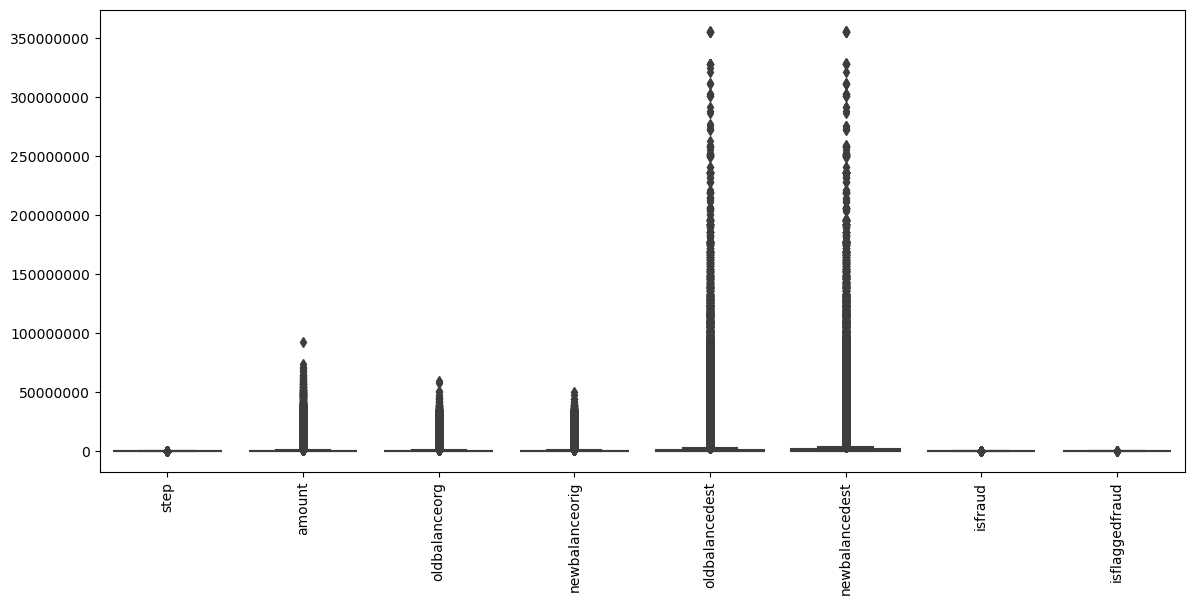

In [32]:
# Checking for the null values
# Visualize outliers for each column using box plots
plt.figure(figsize=(14,6))
sns.boxplot(data=fraud)
plt.xticks(rotation=90)
plt.show()

In fraud detection, transactions that appear as outliers, such as unusually large amounts, zero balances after large transfers, or significant balance changes—are often associated with fraudulent behavior. Treating them as anomalies (i.e., removing or transforming them) could undermine the goal of detecting fraud.
So, we'll not treat these columns.

## Analysis

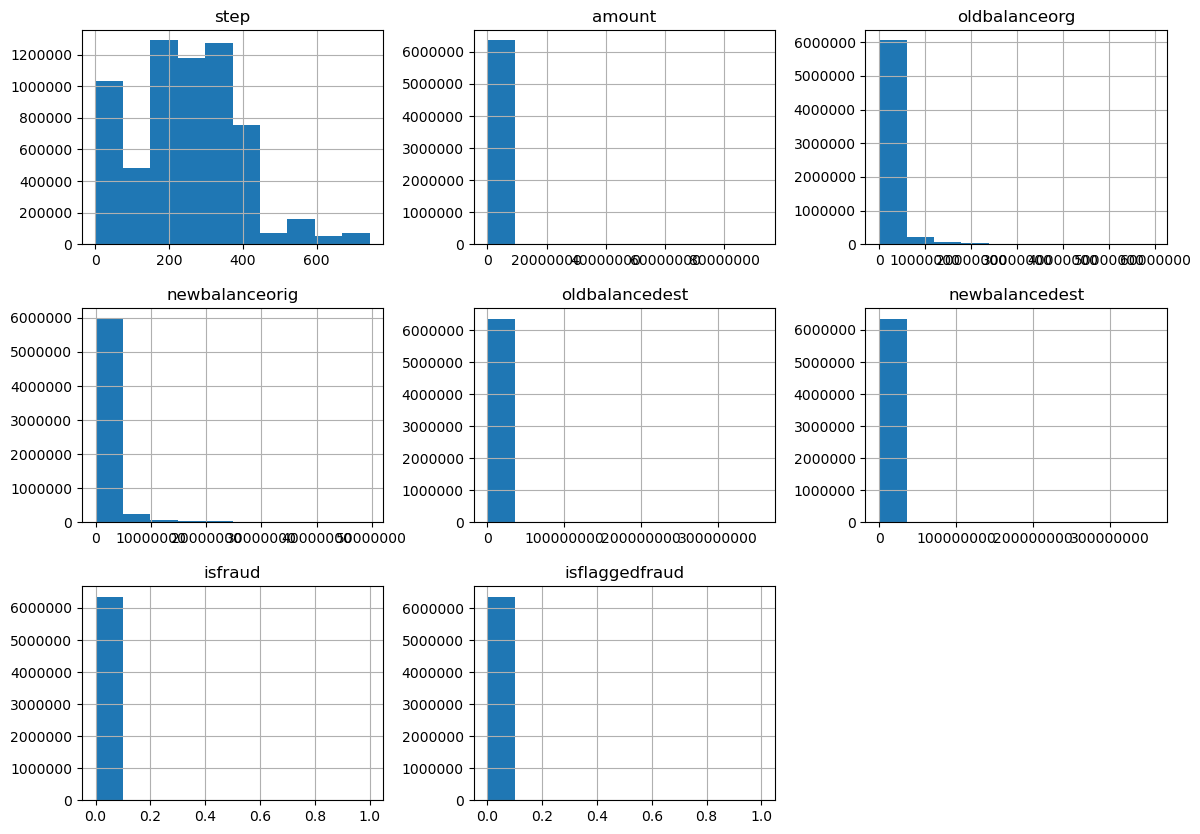

In [35]:
# Display the distribution of the data in the numerical columns
fraud.hist(figsize = (14, 10))
plt.show()

### Step Distribution
- **Transaction Frequency**: Most transactions occur within the first 400 steps, with peaks around steps 200-300. 
  - **Implication**: This could indicate specific times or sequences when fraudulent activities are more likely to occur.

### Amount Distribution
- **Transaction Amounts**: The majority of transactions are for lower amounts, but there is a long tail extending to higher values. 
  - **Implication**: Fraudsters might target both small, frequent transactions and larger, occasional ones.

### Balance Fields
- **Balance Insights**: 
  - **Old Balance (oldbalanceOrg)**: Most accounts have lower balances, but some show very high balances.
  - **New Balance (newbalanceOrig)**: Similar trends are observed, with some accounts maintaining substantial funds.
  - **Recipient Balance (oldbalanceDest & newbalanceDest)**: Accounts exhibit a wide range of balances.
  - **Implication**: Fraudsters might target accounts across the spectrum, from low to high balances.

### Fraud Indicators
- **isFraud and isFlaggedFraud**: These binary fields indicate a significant imbalance, with fraudulent events being rare compared to legitimate transactions.
  - **Implication**: This imbalance is crucial for model training and evaluation, as it affects the accuracy and reliability of fraud detection algorithms.

## Strategic Recommendations
The concentration of transactions within the first 400 steps suggests potential vulnerabilities during specific time periods, possibly during high-traffic hours or end-of-month financial activities. 

- **Fraud Detection Strategies**: 
  - Financial institutions should implement adaptive fraud detection strategies that heighten scrutiny during these peak periods.
  - Maintain efficiency during lower-risk times to optimize resource allocation and enhance overall operational effectiveness.

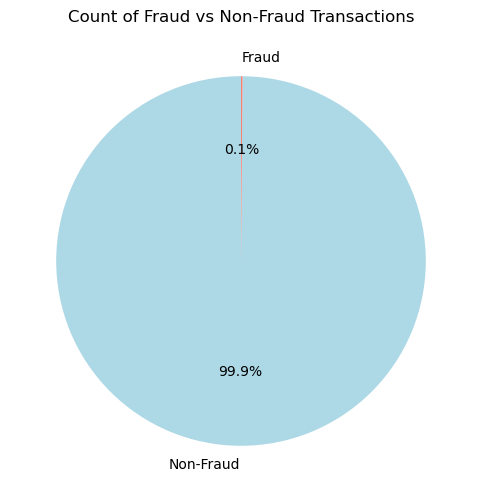

In [36]:
# Plotting the pie chart for the count of fraud vs non-fraud
fraud_count = fraud['isfraud'].value_counts()

# Count of "is_fraud"
plt.figure(figsize=(6, 6))
plt.pie(fraud_count, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Count of Fraud vs Non-Fraud Transactions')
plt.show()

In [37]:
fraud.isfraud.value_counts()

isfraud
0    6354407
1       8213
Name: count, dtype: int64

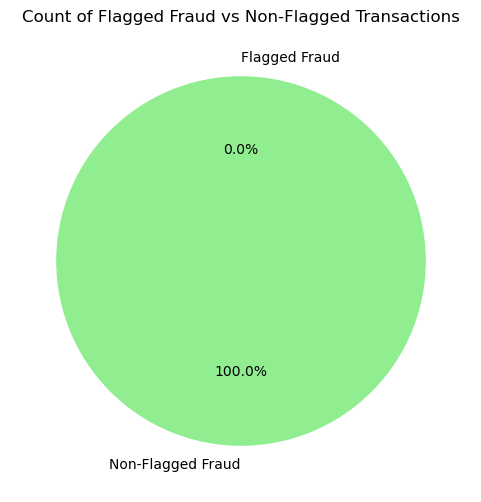

In [38]:
# Plotting the pie chart for the count of flagged_fraud vs flagged_non-fraud
flagged_fraud_count = fraud['isflaggedfraud'].value_counts()

# Count of "is_flagged_fraud"
plt.figure(figsize=(6, 6))
plt.pie(flagged_fraud_count, labels=['Non-Flagged Fraud', 'Flagged Fraud'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'])
plt.title('Count of Flagged Fraud vs Non-Flagged Transactions')
plt.show()

In [40]:
fraud.isflaggedfraud.value_counts()

isflaggedfraud
0    6362604
1         16
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

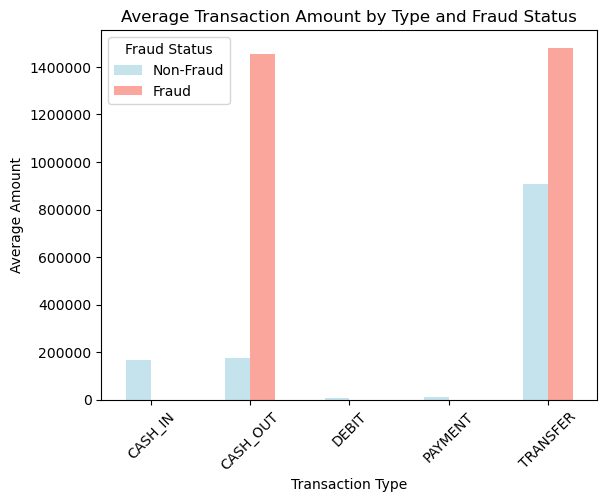

In [53]:
# Calculate average amount by type and fraud status
avg_amount_by_type = fraud.groupby(['type', 'isfraud'])['amount'].mean().unstack()

plt.figure(figsize=(12, 6))
avg_amount_by_type.plot(kind='bar', color=['lightblue', 'salmon'], alpha=0.7)
plt.title('Average Transaction Amount by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.legend(title='Fraud Status', labels=['Non-Fraud', 'Fraud'])
plt.show()

### Average Transaction Amount by Type and Fraud Status
- **CASH_OUT and TRANSFER**: These transaction types show significantly higher average amounts for fraudulent transactions compared to non-fraudulent ones.
- **CASH_IN**: This type does not show any fraudulent activity in this dataset, indicating it may not be a common target for fraudsters.
- **DEBIT and PAYMENT**: These transactions are not visible in the analysis, suggesting they might be rare or have very low average amounts.

## Implications
The significantly higher average amounts for fraudulent CASH_OUT and TRANSFER transactions indicate that criminals are targeting high-value transactions. This suggests a sophisticated approach, potentially involving:
- **Social Engineering**: Manipulating individuals into revealing confidential information.
- **Account Takeover**: Gaining unauthorized access to customer accounts to perform transactions.

## Strategic Recommendations
- **Enhanced Verification**: Banks should implement additional verification steps for high-value transactions, such as:
  - **Two-Factor Authentication (2FA)**: Requiring a second form of verification before processing transactions.
  - **Callback Verification**: Implementing a callback process for amounts exceeding certain thresholds to confirm the legitimacy of the transaction.

<Figure size 1200x600 with 0 Axes>

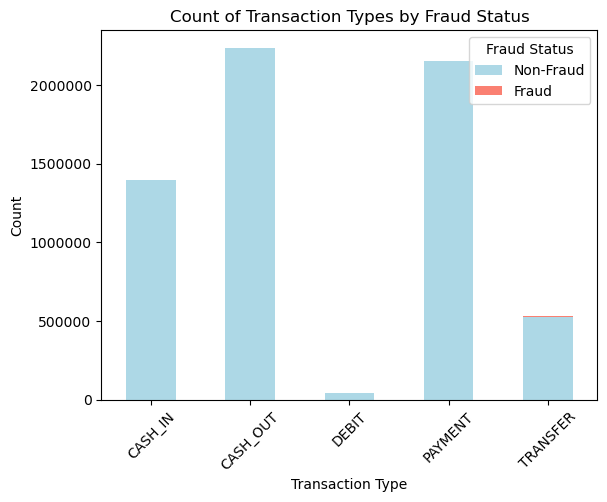

In [57]:
# Count the number of transactions for each type by fraud status
count_by_type = fraud.groupby(['type', 'isfraud']).size().unstack()

plt.figure(figsize=(12, 6))
count_by_type.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Count of Transaction Types by Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud Status', labels=['Non-Fraud', 'Fraud'], loc='upper right')
plt.show()

### Transaction Type Counts
- **Fraudulent Activities**: Only **CASH_OUT** and **TRANSFER** transaction types show visible fraudulent activities.
- **Most Common Transactions**: **PAYMENT** transactions are the most common overall, followed by **CASH_OUT** and **CASH_IN**.
- **Fraud vs. Non-Fraud**: Fraudulent transactions are significantly rarer compared to non-fraudulent ones across all transaction types.

## Implications
The concentration of fraud in **CASH_OUT** and **TRANSFER** transactions, despite **PAYMENT** being the most common type, suggests that fraudsters are exploiting specific weaknesses in these transaction channels. 

## Strategic Recommendations
- **Security Audits**: Financial institutions should conduct thorough security audits of their **CASH_OUT** and **TRANSFER** processes.
- **Implementation of Delays**: Consider implementing delays or additional verification checks for large or unusual transactions within these categories to mitigate potential fraud.

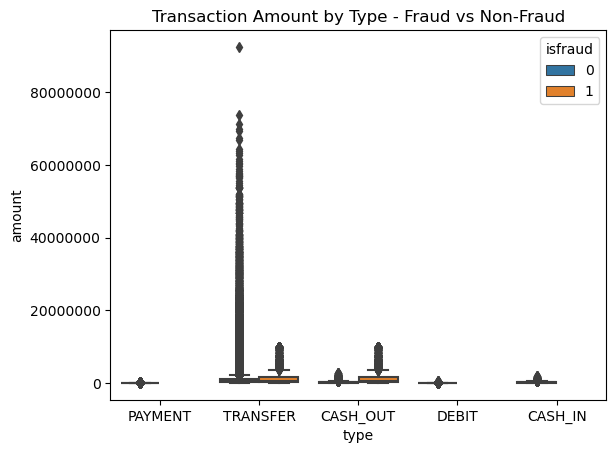

In [43]:
# Box plot to find that which transaction has more fraud
sns.boxplot(x='type', y='amount', hue='isfraud', data=fraud)
plt.title('Transaction Amount by Type - Fraud vs Non-Fraud')
plt.show()

### Variability in Amounts
- **TRANSFER Transactions**: Show the highest variability in amounts for both fraud and non-fraud cases.
- **Fraudulent Amounts**: Fraudulent transactions in **TRANSFER** and **CASH_OUT** types tend to have higher amounts compared to their non-fraudulent counterparts.
- **Low Fraud Activity**: **PAYMENT**, **DEBIT**, and **CASH_IN** transactions show little to no fraudulent activity.

## Implications
The wide range of transaction amounts in fraudulent **TRANSFER** and **CASH_OUT** activities suggests that criminals are employing various tactics. This ranges from "low and slow" approaches to bold, high-value fraud attempts.

## Strategic Recommendations
- **Multi-Layered Fraud Detection**: Implement a multi-layered fraud detection strategy that combines:
  - **Real-Time Transaction Monitoring**: To catch suspicious transactions as they occur.
  - **Periodic Account Behavior Analysis**: To identify unusual patterns over time and catch both types of fraudulent activities.

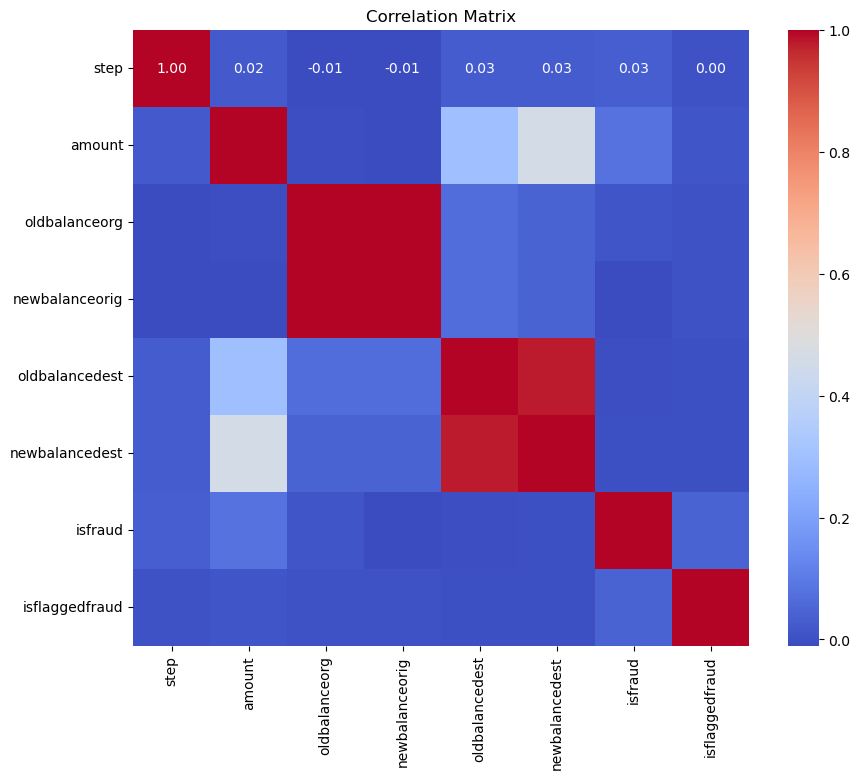

In [61]:
# Select only numeric columns for the correlation matrix
numeric_fraud = fraud.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_fraud.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### Strong Positive Correlation
- **Balances Before and After Transactions**:
  - There is a strong positive correlation between **oldbalanceorg** and **newbalanceorg**.
  - Similarly, a strong positive correlation exists between **oldbalancedest** and **newbalancedest**.
  - This correlation is expected, as these variables represent balances before and after transactions.

### Weak Positive Correlation
- **Transaction Amounts**:
  - A weak positive correlation is observed between **amount** and **newbalancedest**, suggesting that larger transactions tend to result in higher destination balances.

### Very Weak Correlations
- Most other variables, including **isfraud**, exhibit very weak correlations with other features.

## Implications
The weak correlations between most variables and the fraud indicator imply that fraudsters are skilled at mimicking normal transaction patterns. 

## Strategic Recommendations
- **Advanced Machine Learning Models**: Financial institutions should invest in advanced machine learning models capable of detecting subtle anomalies across multiple dimensions.
- **AI-Powered Fraud Detection Systems**: Implement AI-powered systems that can analyze complex patterns and continually adapt to evolving fraud tactics, enhancing overall detection capabilities.

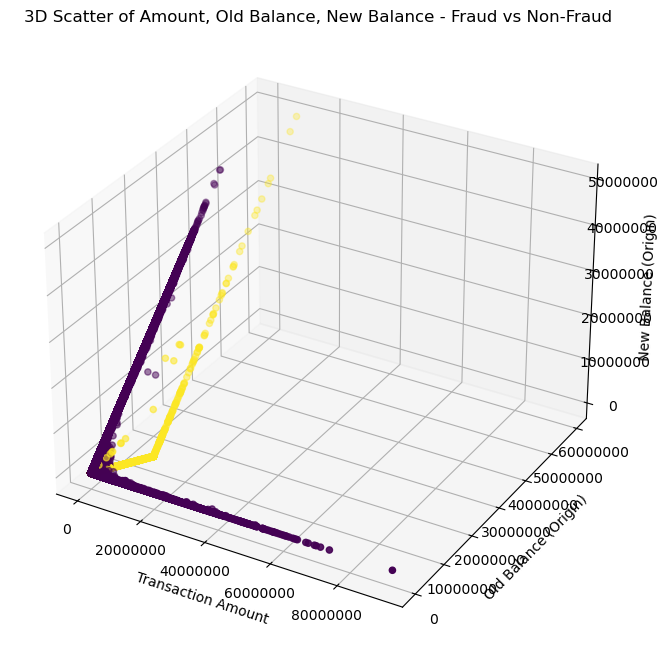

In [71]:
# Trying to vvisualise the multivariate pattern in 3d form
figure = plt.figure(figsize=(14, 8))
ax = figure.add_subplot(111, projection='3d')

ax.scatter(fraud['amount'], fraud['oldbalanceorg'], fraud['newbalanceorig'], c=fraud['isfraud'])
ax.set_xlabel('Transaction Amount')
ax.set_ylabel('Old Balance (Origin)')
ax.set_zlabel('New Balance (Origin)')
plt.title('3D Scatter of Amount, Old Balance, New Balance - Fraud vs Non-Fraud')
plt.show()

In [26]:
# Checking for the multicollinearity.
# Selecting only the numeric columns for VIF calculation
X = fraud[['amount', 'oldbalanceorg', 'newbalanceorig', 'oldbalancedest', 'newbalancedest']]

# Add constant to data (needed for VIF calculation)
X = add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

          Feature         VIF
0           const    1.249912
1          amount    3.704164
2   oldbalanceorg  430.052765
3  newbalanceorig  431.093970
4  oldbalancedest   64.982048
5  newbalancedest   74.887727


Here, oldbalanceorg and newbalanceorig are highly correlated.

We'll drop oldbalanceorg as our goal is to understand the frauds and transactional impact on the balances we'll keep newbalanceorig as it is the final balance and is much more informative (these both represent same account but with different point of the time)

## Modelling

In [109]:
# Separate the fraud and non-fraud cases
df_fraud = fraud[fraud['isfraud'] == 1]
df_non_fraud = fraud[fraud['isfraud'] == 0]

# Take exactly 8213 non-fraud cases (matching the number of fraud cases)
df_non_fraud_undersampled = df_non_fraud.sample(n=len(df_fraud), random_state=42)

# Combine the fraud cases with the undersampled non-fraud cases
df_balanced = pd.concat([df_fraud, df_non_fraud_undersampled])

# Drop the 'oldbalanceorg' column since it's not needed
df_balanced = df_balanced.drop(columns=['oldbalanceorg'])

# Shuffle the dataset to randomize the order
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the balance of the dataset
print(df_balanced['isfraud'].value_counts())

isfraud
0    8213
1    8213
Name: count, dtype: int64


In [113]:
df_balanced.head()

,step,type,amount,nameorig,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
0,397,CASH_IN,76550.74,C658247527,1172803.66,C492670573,2208784.02,2132233.28,0,0
1,251,PAYMENT,12617.11,C1812418129,326564.76,M1924423059,0.00,0.00,0,0
2,98,CASH_OUT,8055.06,C1544350298,0.00,C912405348,0.00,8055.06,1,0
3,550,TRANSFER,342309.91,C662184778,0.00,C1740503020,0.00,0.00,1,0
4,586,CASH_OUT,2581549.92,C648614053,0.00,C213455810,0.00,2581549.92,1,0


In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target (y), excluding 'oldbalanceorg' and 'isfraud'
X = df_balanced.drop(columns=['isfraud'])  # Exclude 'isfraud' and 'oldbalanceorg'
y = df_balanced['isfraud']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display shapes to verify scaling
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


X_train_scaled shape: (13140, 9)
X_test_scaled shape: (3286, 9)


In [147]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay

# Initialize StratifiedKFold for cross-validation (to maintain class balance in folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate models using cross-validation
def cross_validate_model(model, X, y, cv):
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    return accuracy

Random Forest Cross-Validated Accuracy: 0.9267
----------------------- Random Forest Model Evaluation -----------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1643
           1       0.95      0.91      0.93      1643

    accuracy                           0.93      3286
   macro avg       0.93      0.93      0.93      3286
weighted avg       0.93      0.93      0.93      3286

----------------------- Random Forest Confusion Matrix -----------------------
True Negatives (TN): 1565
False Positives (FP): 78
False Negatives (FN): 144
True Positives (TP): 1499


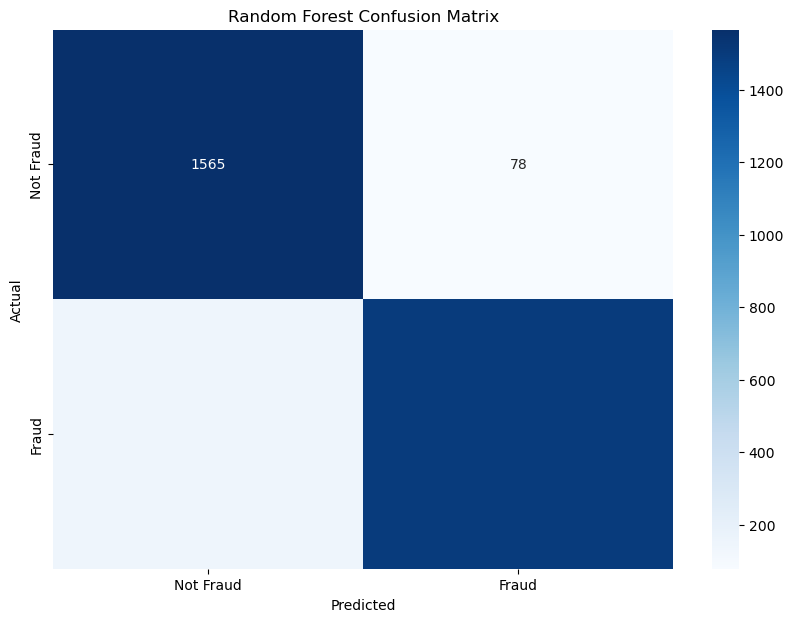

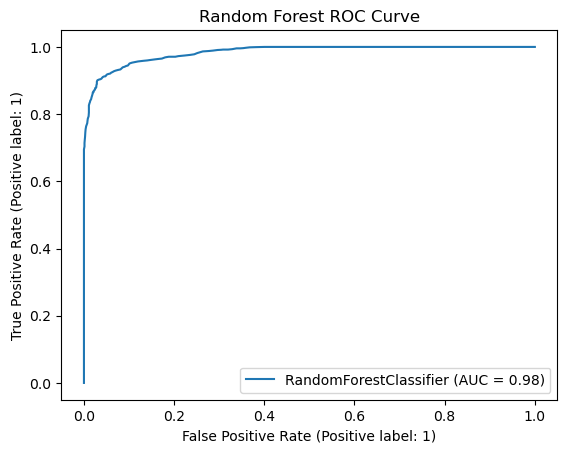

In [167]:
# 1. Random Forest Model
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# Cross-validation accuracy for Random Forest
rf_cv_scores = cross_validate_model(random_forest, X_train_scaled, y_train, skf)
print(f'Random Forest Cross-Validated Accuracy: {rf_cv_scores.mean():.4f}')

# Train and evaluate Random Forest
random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_test_scaled)

# Confusion Matrix and Classification Report for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
TN_rf, FP_rf, FN_rf, TP_rf = conf_matrix_rf.ravel()  # Unpack the confusion matrix
print("----------------------- Random Forest Model Evaluation -----------------------")
print(classification_report(y_test, y_pred_rf))

print("----------------------- Random Forest Confusion Matrix -----------------------")
print(f'True Negatives (TN): {TN_rf}')
print(f'False Positives (FP): {FP_rf}')
print(f'False Negatives (FN): {FN_rf}')
print(f'True Positives (TP): {TP_rf}')

# Confusion Matrix Heatmap for Random Forest
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# ROC Curve for Random Forest
RocCurveDisplay.from_estimator(random_forest, X_test_scaled, y_test)
plt.title('Random Forest ROC Curve')
plt.show()

# Random Forest Model Evaluation

### Accuracy (92.67%)
- Implies the model can effectively handle diverse transaction patterns.
- Suggests robust performance across various fraud scenarios.

### Precision
- **Class 0 (Non-fraud):** 0.92
- **Class 1 (Fraud):** 0.95  
**Implication:**  
Higher precision for fraud cases means fewer false alarms, reducing operational costs and customer friction.

### Recall
- **Class 0 (Non-fraud):** 0.95
- **Class 1 (Fraud):** 0.91  
**Implication:**  
Slightly lower recall for fraud cases suggests some fraudulent transactions may be missed, but overall detection rate is still high.

### F1-score
- **Both classes:** 0.93  
**Implication:**  
Balanced performance across precision and recall for both fraud and non-fraud cases, indicating consistent model performance.

### Support
- **Equal support (1643)** for both classes  
**Implication:**  
Balanced dataset, ensuring the model is not biased towards a particular class.

### Macro avg and Weighted avg
- **Both 0.93** across precision, recall, and F1-score  
**Implication:**  
Consistent performance across classes, suggesting the model handles class imbalance well.

---

### Summary
- Balanced precision and recall (both ~0.93) indicate equal emphasis on minimizing false positives and false negatives.
- High F1-score (0.93) suggests consistent performance across different fraud patterns.

---

# Confusion Matrix Analysis

- **True Negatives (TN):** 1565 (correctly identified non-fraud)
- **False Positives (FP):** 78 (incorrectly flagged non-fraud as fraud)
- **False Negatives (FN):** 144 (missed fraud cases)
- **True Positives (TP):** 1499 (correctly identified fraud)

### Breakdown

- **True Negatives (1565):**  
  High number of correctly identified legitimate transactions, minimizing customer inconvenience.
  
- **False Positives (78):**  
  Relatively low false alarm rate (4.7% of non-fraud cases), but still represents potential for customer friction and operational costs.

---

# ROC Curve (AUC 0.98)

### High AUC Value:
- **Implication:**  
  Excellent discrimination ability between fraud and non-fraud cases across various threshold settings.

### Curve Shape:
- **Implication:**  
  Steep initial rise suggests the model achieves high true positive rates even at very low false positive rates.

### Threshold Flexibility:
- **Implication:**  
  Allows for fine-tuning the model's sensitivity based on operational requirements or risk tolerance.

### Model Stability:
- **Implication:**  
  Consistent performance across different operating points, indicating robustness to threshold changes.

XGBoost Cross-Validated Accuracy: 0.9353
----------------------- XGBoost Model Evaluation -----------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1643
           1       0.95      0.92      0.94      1643

    accuracy                           0.94      3286
   macro avg       0.94      0.94      0.94      3286
weighted avg       0.94      0.94      0.94      3286

----------------------- XGBoost Confusion Matrix -----------------------
True Negatives (TN): 1564
False Positives (FP): 79
False Negatives (FN): 130
True Positives (TP): 1513


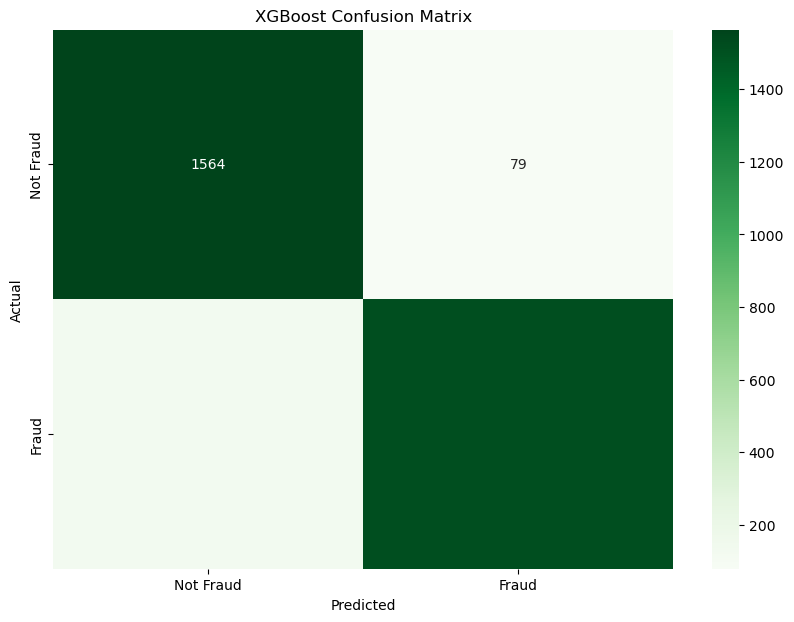

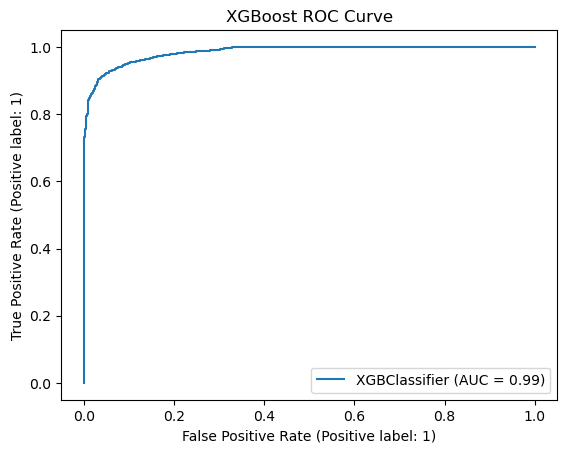

In [169]:
# 2. XGBoost Model
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)

# Cross-validation accuracy for XGBoost
xgb_cv_scores = cross_validate_model(xgboost, X_train_scaled, y_train, skf)
print(f'XGBoost Cross-Validated Accuracy: {xgb_cv_scores.mean():.4f}')

# Train and evaluate XGBoost
xgboost.fit(X_train_scaled, y_train)
y_pred_xgb = xgboost.predict(X_test_scaled)

# Confusion Matrix and Classification Report for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
TN_xgb, FP_xgb, FN_xgb, TP_xgb = conf_matrix_xgb.ravel()  # Unpack the confusion matrix
print("----------------------- XGBoost Model Evaluation -----------------------")
print(classification_report(y_test, y_pred_xgb))

print("----------------------- XGBoost Confusion Matrix -----------------------")
print(f'True Negatives (TN): {TN_xgb}')
print(f'False Positives (FP): {FP_xgb}')
print(f'False Negatives (FN): {FN_xgb}')
print(f'True Positives (TP): {TP_xgb}')

# Confusion Matrix Heatmap for XGBoost
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

# ROC Curve for XGBoost
RocCurveDisplay.from_estimator(xgboost, X_test_scaled, y_test)
plt.title('XGBoost ROC Curve')
plt.show()

# XGBoost Model Evaluation

### Accuracy (93.53%)
- Slightly superior overall performance compared to Random Forest.
- Indicates XGBoost may be capturing more nuanced fraud patterns.

### Precision
- **Class 0 (Non-fraud):** 0.92
- **Class 1 (Fraud):** 0.95  
**Implication:**  
Identical to Random Forest, maintaining high confidence in fraud predictions.

### Recall
- **Class 0 (Non-fraud):** 0.95
- **Class 1 (Fraud):** 0.92  
**Implication:**  
Slightly improved recall for fraud cases compared to Random Forest, potentially catching more fraudulent transactions.

### F1-score
- **Class 0:** 0.94
- **Class 1:** 0.94  
**Implication:**  
Marginally better balanced performance compared to Random Forest, especially for fraud detection.

### Support
- **Equal support (1643)** for both classes  
**Implication:**  
Consistent with Random Forest, ensuring fair model training and evaluation.

### Macro avg and Weighted avg
- **Both 0.94** across precision, recall, and F1-score  
**Implication:**  
Slightly superior overall performance compared to Random Forest, suggesting better generalization across classes.

---

### Summary
- Marginally higher recall (0.92 vs 0.91) suggests better capture of diverse fraud cases.
- Consistent precision (0.95) across both models implies similar false positive rates.

---

# Confusion Matrix Analysis

- **True Negatives (TN):** 1564 (correctly identified non-fraud)
- **False Positives (FP):** 79 (incorrectly flagged non-fraud as fraud)
- **False Negatives (FN):** 130 (missed fraud cases)
- **True Positives (TP):** 1513 (correctly identified fraud)

### Breakdown
- **True Negatives (1564):**  
  Nearly identical performance to Random Forest in correctly identifying legitimate transactions.

- **False Positives (79):**  
  Slightly higher false alarm rate compared to Random Forest, but the difference is negligible (0.06% higher).

---

# ROC Curve (AUC 0.99)

### Higher AUC Value:
- **Implication:**  
  Marginally better discrimination ability compared to Random Forest, potentially offering more precise fraud detection.

### Curve Shape:
- **Implication:**  
  Likely exhibits an even steeper initial rise, indicating superior performance at low false positive rates.

### Threshold Flexibility:
- **Implication:**  
  Offers even greater flexibility in setting operating thresholds to balance detection rates and false alarms.

### Model Stability:
- **Implication:**  
  Extremely consistent performance across different operating points, suggesting high reliability in various scenarios.

# Model Performance Summary: Random Forest vs. XGBoost

Both Random Forest and XGBoost show that your models are performing well, but let's break down the performance metrics to understand in detail:

## Comparison Conclusion of Models

### 1. Accuracy:
- **Random Forest:** 92.67%
- **XGBoost:** 93.53%  
Both models have high overall accuracy, indicating that they are correctly classifying the majority of transactions as fraud or non-fraud. XGBoost is slightly outperforming Random Forest in terms of accuracy.

### 2. Precision:
- **Random Forest (Fraud):** 0.95
- **XGBoost (Fraud):** 0.95  
Precision measures how many transactions predicted as fraud are actually fraud. Both models have high precision (95%), meaning they are very accurate in identifying fraudulent transactions without generating many false positives (incorrectly predicting fraud when it's non-fraud).

### 3. Recall:
- **Random Forest (Fraud):** 0.91
- **XGBoost (Fraud):** 0.92  
Recall (also known as sensitivity) measures how well the models identify actual fraud cases. A recall of 91% (Random Forest) and 92% (XGBoost) indicates that the models are identifying most of the fraudulent transactions but still missing some (False Negatives).

### 4. F1-Score:
- **Random Forest (Fraud):** 0.93
- **XGBoost (Fraud):** 0.94  
The F1-score balances precision and recall, providing a better sense of overall performance for fraud detection. A high F1-score in both models (93% for Random Forest and 94% for XGBoost) confirms strong performance in identifying fraud.

### 5. Confusion Matrix Insights:
**Random Forest:**
- **True Negatives (TN):** 1565 (correctly identified non-fraud)
- **False Positives (FP):** 78 (incorrectly flagged non-fraud as fraud)
- **False Negatives (FN):** 144 (missed fraud cases)
- **True Positives (TP):** 1499 (correctly identified fraud)

**XGBoost:**
- **True Negatives (TN):** 1564
- **False Positives (FP):** 79
- **False Negatives (FN):** 130
- **True Positives (TP):** 1513  
Both models have relatively low false positives, meaning they don't incorrectly predict fraud often. However, they still miss some fraud cases (false negatives), although XGBoost slightly reduces this number compared to Random Forest (130 vs. 144).

---

## Conclusion:

### Strengths:
- Both models have high precision, meaning they are accurate in detecting fraud without falsely flagging non-fraudulent transactions.
- High recall shows they are catching the majority of fraudulent transactions.
- XGBoost slightly outperforms Random Forest in terms of overall accuracy, recall, and F1-score, making it a slightly better choice in this case.

### Weaknesses:
- Both models still have some False Negatives (missed frauds). Depending on your goal, you may want to prioritize recall further to catch more fraudulent cases, potentially at the expense of a few more false positives.

---

## Comparative Implications:
- Both models demonstrate excellent fraud detection capabilities, with XGBoost showing a slight edge.
- The similar confusion matrices suggest that in practice, both models would have comparable operational impact.
- XGBoost's higher AUC indicates it might offer more fine-grained control in balancing fraud detection against false alarms.
- The high AUC values for both models suggest they could be effectively deployed in high-stakes financial environments where both accuracy and flexibility are crucial.
- Both models show strong performance, with XGBoost having a slight edge.
- High precision for fraud cases in both models suggests efficient use of resources in fraud investigation.
- The balanced performance across classes indicates robustness to different types of transactions.
- XGBoost's marginally better recall for fraud cases could translate to significant financial savings in a large-scale deployment.
- The consistent performance across metrics suggests both models would be reliable in real-world applications, with XGBoost potentially offering a small advantage in catching more fraudulent activities.

# Real-Life Questions on Our Model and Our Answers

## Key Factors that Predict Fraudulent Customers

1. **Transaction Amount**: 
   - Higher transaction amounts may correlate with increased risk of fraud, especially if they are unusually large for the customer.

2. **Transaction Type**: 
   - Certain transaction types (like CASH-OUT) may be more frequently associated with fraudulent activities compared to others (like CASH-IN).

3. **Old and New Balances**: 
   - Large discrepancies between the old and new balances before and after transactions can indicate suspicious behavior.

4. **Customer Behavior**: 
   - Patterns of rapid account changes, like frequent cash-outs, or transactions to new or previously inactive accounts may signal fraud.

### Do These Factors Make Sense?
Yes, the identified factors align with typical patterns observed in fraudulent activities. For instance:
- **Transaction Amount**: Fraudsters often attempt to extract large sums quickly before being detected.
- **Transaction Type**: Cashing out funds is a primary goal of fraud, which makes it a red flag.
- **Balance Discrepancies**: Sudden changes in account balance can indicate that funds are being transferred or withdrawn illicitly.

Overall, these factors are grounded in logical reasoning based on how fraud typically occurs in financial systems.

---

## Prevention Strategies for Infrastructure Updates

1. **Enhanced Verification Processes**: 
   - Implement stricter customer verification procedures for high-risk transactions, including multi-factor authentication (MFA) and identity verification checks.

2. **Real-Time Monitoring and Alerts**: 
   - Set up systems to monitor transactions in real time and generate alerts for suspicious activities, such as large withdrawals or transfers to new accounts.

3. **Data Analytics and Machine Learning**: 
   - Leverage advanced analytics to identify patterns indicative of fraud, allowing for predictive measures to be taken.

4. **User Education**: 
   - Provide educational resources to customers about the risks of fraud and how to protect their accounts.

---

## Determining Effectiveness of Preventive Actions

1. **Reduction in Fraudulent Transactions**: 
   - Monitor the frequency and total value of fraud cases before and after implementing preventive measures. A significant decrease would indicate effectiveness.

2. **Customer Feedback**: 
   - Gather feedback from customers regarding their experiences and concerns. Improved perceptions can indicate that prevention measures are working.

3. **Transaction Monitoring**: 
   - Assess the volume of transactions flagged for review or investigation. A drop in false positives while still catching actual fraud would indicate improved accuracy.

4. **Audit Reports**: 
   - Regularly conduct audits to assess the overall health of the fraud prevention system and make adjustments as necessary.

5. **A/B Testing**: 
   - Implement changes in a controlled manner and compare results to a control group to assess the impact of specific measures.

By continuously evaluating these metrics, a company can gauge the effectiveness of its fraud prevention strategies and adjust them accordingly to enhance security and customer trust.
